In [36]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [37]:
def simplerocket(state,dmdt=0.05, u=250):

    '''Computes the right-hand side of the differential equation
    for the acceleration of a rocket, without drag or gravity, in SI units.
    Arguments
    ----------
    state : array of three dependent variables [y v m]^T
    dmdt : mass rate change of rocket in kilograms/s default set to 0.05 kg/s
    u : speed of propellent expelled (default is 250 m/s)
    Returns
    -------
    derivs: array of three derivatives [v (u/m*dmdt-g-c/mv^2) -dmdt]^T
    '''
    dstate = np.zeros(np.shape(state))
    y0 = state[0]
    v = state[1]
    m = state[2]
    a = (u/m)*dmdt
    dmdt = -dmdt
    dstate = np.array([v,a,dmdt])
    return dstate

In [38]:
m0=0.25
mf=0.05
dm=0.05
t = np.linspace(0,(m0-mf)/dm,500)
dt=t[1]-t[0]

In [39]:
# Defines a function for the runge-kutta method of integration

def rk2_step(state, rhs, dt):

    '''Update a state to the next time increment using modified Euler's method.

    1

    Arguments
    ---------
    state : array of dependent variables
    rhs : function that computes the RHS of the DiffEq
    dt : float, time increment
    Returns
    -------
    next_state : array, updated after one time increment'''
    mid_state = state + rhs(state) * (dt*0.5)
    next_state = state + rhs(mid_state)*dt
    return next_state

In [40]:
st = [0,0,0.25]
values = np.zeros((len(t),3))
values[0] = st
# values is the time integral of dstate, which is equal to [y,v,m]
for i in range(len(t)-1):
    values[i+1] = rk2_step(values[i], simplerocket, dt)

In [41]:
P = values[:,0]
v = values[:,1]
m = values[:,2]
v0 = v[0]
m0 = m[0]
u = 250
mr_int = np.zeros(len(t))
mr_an = mr_int
dv = np.zeros(len(t))
#mr_int is mass ratio for integration method above
#mr_an is mass ratio for analytical method
for i in range(len(t)-1):
    mr_int[i] = m[i]/m[0]
    dv[i] = v[i]-v[0]
    mr_an[i] = np.e**(-dv[i]/u)

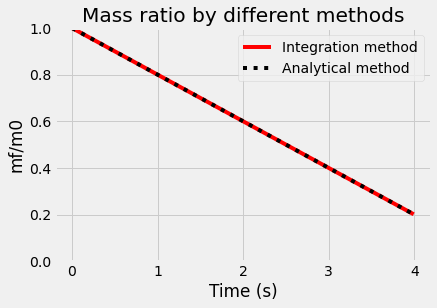

In [45]:
# Final point of each element removed because it goes to zero at that point

plt.plot(t[:-1],mr_int[:-1], 'r-',label = 'Integration method');
plt.plot(t[:-1],mr_an[:-1], 'k:', label = 'Analytical method');


plt.title("Mass ratio by different methods")
plt.ylabel("mf/m0")
plt.xlabel("Time (s)")
plt.ylim(0,1)
plt.legend();


In [46]:
def rocket(state,dmdt=0.05, u=250,c=0.18e-3):

    '''Computes the right-hand side of the differential equation
    for the acceleration of a rocket, with drag, in SI units.
    Arguments
    ----------
    state : array of three dependent variables [y v m]^T
    dmdt : mass rate change of rocket in kilograms/s default set to 0.05 kg/s
    u : speed of propellent expelled (default is 250 m/s)
    c : drag constant for a rocket set to 0.18e-3 kg/m
    Returns
    -------
    derivs: array of three derivatives [v (u/m*dmdt-g-c/mv^2) -dmdt]^T

    3

    '''
    g=9.81
    dstate = np.zeros(np.shape(state))
    y0 = state[0]
    v = state[1]
    m = state[2]
    a = (u/m)*dmdt-g-c*v**2/m
    dmdt = -dmdt
    dstate = np.array([v,a,dmdt], dtype = object)
    return dstate

In [47]:
st = [0,0,0.25]
values2 = np.zeros((len(t),3))
values2[0] = st
# values is the time integral of dstate, which is equal to [y,v,m]
for i in range(len(t)-1):
    values2[i+1] = rk2_step(values2[i], rocket, dt)

The rocket reaches a height of 597.637959339353 with no drag and 425.4431801148287 with drag


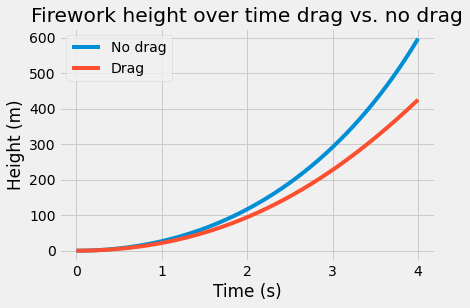

In [49]:
P2 = values2[:,0]
plt.plot(t, P, label = 'No drag');
plt.plot(t, P2, label = 'Drag');
plt.legend();
plt.ylabel("Height (m)")
plt.xlabel("Time (s)")
plt.title("Firework height over time drag vs. no drag")
print(f"The rocket reaches a height of {P[-1]} with no drag and {P2[-1]} with drag")

In [50]:
def f_dm(dmdt, m0 = 0.25, c = 0.18e-3, u = 250):
    ''' define a function f_dm(dmdt) that returns
    height_desired-height_predicted[-1]
    here, the time span is based upon the value of dmdt
    arguments:
    ---------
    dmdt: the unknown mass change rate
    m0: the known initial mass
    c: the known drag in kg/m
    u: the known speed of the propellent
    returns:
    --------
    error: the difference between height_desired and height_predicted[-1]
    when f_dm(dmdt) = 0, the correct mass change rate was chosen
    '''
    state = [0,0,0.25]
    g=9.81
    dstate = np.zeros(np.shape(state))
    y0 = state[0]
    v = state[1]
    m = state[2]
    a = (u/m)*dmdt-g-c*v**2/m
    dmdt = -dmdt
    dstate = np.array([v,a,dmdt])
    # values is the time integral of dstate, which is equal to [y,v,m]
    mf=0.05
    t = np.linspace(0,(m0-mf)/dmdt,500)
    dt=t[1]-t[0]
    values2 = np.zeros((len(t),3))
    values2[0] = state
    for i in range(len(t)-1):
        values2[i+1] = rk2_step(values2[i], rocket, dt)
    height = abs(values2[-1,0])
    height_desired = 300
    error = height_desired - height
    return error

In [51]:
def f_dma(dmdt_values, m0=0.25, c=0.18e-3, u=250):

    errors = []
    for dmdt in dmdt_values:
        state = [0, 0, 0.25]
        g = 9.81
        y0, v, m = state
        a = (u / m) * dmdt - g - c * v ** 2 / m
        dmdt = -dmdt
        dstate = np.array([v, a, dmdt])
        mf = 0.05
        t = np.linspace(0, (m0 - mf) / dmdt, 500)
        dt = t[1] - t[0]
        values2 = np.zeros((len(t), 3))
        values2[0] = state
        for i in range(len(t) - 1):
            values2[i + 1] = rk2_step(values2[i], rocket, dt)
        height = values2[-1, 0]
        height_desired = 300
        error = height_desired - height
        errors.append(error)
    return np.array(errors)

In [52]:
x = np.linspace(0.01,0.5,50)
f_dma(x)

array([-2091.50471277,  -688.2721263 ,  -239.99866866,   -40.41874844,
          65.80536364,   129.05160645,   169.74569197,   197.46686544,
         217.19710571,   231.73689499,   242.75909522,   251.31310283,
         258.0842837 ,   263.53564275,   267.98909856,   271.67409636,
         274.75774412,   277.3640832 ,   279.5867509 ,   281.49750313,
         283.15207491,   284.59428823,   285.85898165,   286.97413275,
         287.96241767,   288.8423724 ,   289.62926764,   290.33577552,
         290.97248261,   291.5482886 ,   292.07071889,   292.54617153,
         292.98011398,   293.37724088,   293.74160159,   294.07670367,
         294.38559765,   294.67094665,   294.93508395,   295.18006082,
         295.40768646,   295.61956147,   295.81710609,   296.00158399,
         296.17412261,   296.33573034,   296.48731133,   296.62967817,
         296.76356274,   296.88962569])

In [53]:
def incsearch(func,xmin,xmax,ns=50):

    '''incsearch: incremental search root locator
    xb = incsearch(func,xmin,xmax,ns):
    finds brackets of x that contain sign changes
    of a function on an interval
    arguments:
    ---------
    func = name of function
    xmin, xmax = endpoints of interval
    ns = number of subintervals (default = 50)
    returns:
    ---------
    xb(k,1) is the lower bound of the kth sign change
    xb(k,2) is the upper bound of the kth sign change
    If no brackets found, xb = [].'''
    x = np.linspace(xmin,xmax,ns)
    f = func(x)
    sign_f = np.sign(f)
    delta_sign_f = sign_f[1:]-sign_f[0:-1]
    i_zeros = np.nonzero(delta_sign_f!=0)
    nb = len(i_zeros[0])
    xb = np.block([[ x[i_zeros[0]+1]],[x[i_zeros[0]] ]] )

    if nb==0:
        print('no brackets found\n')
        print('check interval or increase ns\n')
    else:
        print('number of brackets: {}\n'.format(nb))
    return xb

In [54]:
incsearch(f_dma, 0.039, 0.044, 10)

number of brackets: 1



array([[0.04344444],
       [0.04288889]])

In [55]:
f_dm(0.043171166227047586)

-1.1840574529742298e-06

In [56]:
def mod_secant(func,dx,x0,es=0.0001,maxit=50):

    '''mod_secant: Modified secant root location zeroes
    root,[fx,ea,iter]=mod_secant(func,dfunc,xr,es,maxit,p1,p2,...):
    uses modified secant method to find the root of func
    arguments:
    ----------
    func = name of function
    dx = perturbation fraction
    xr = initial guess
    es = desired relative error (default = 0.0001 )
    maxit = maximum allowable iterations (default = 50)
    p1,p2,... = additional parameters used by function
    returns:
    --------
    root = real root
    fx = func evaluated at root
    ea = approximate relative error ( )
    iter = number of iterations'''
    iter = 0;
    xr=x0
    for iter in range(0,maxit):
        xrold = xr;
        dfunc=(func(xr+dx)-func(xr))/dx;
        xr = xr - func(xr)/dfunc;
        if xr != 0:
            ea = abs((xr - xrold)/xr) * 100;
        else:
            ea = abs((xr - xrold)/1) * 100;
        if ea <= es:
            break
    return xr,[func(xr),ea,iter]

In [57]:
mod_secant(f_dm, 0.001,0.043)

(0.043171166227047586, [-1.1840574529742298e-06, 8.369062929699279e-06, 3])

In [58]:
mod_secant(f_dm,0.01,0.043)[0]

0.043171169509054384

In [59]:
def high(dmdt, m0 = 0.25, c = 0.18e-3, u = 250):
    ''' define a function f_dm(dmdt) that returns
    height_desired-height_predicted[-1]
    here, the time span is based upon the value of dmdt
    arguments:
    ---------
    dmdt: the unknown mass change rate
    m0: the known initial mass
    c: the known drag in kg/m
    u: the known speed of the propellent
    returns:
    --------
    error: the difference between height_desired and height_predicted[-1]
    when f_dm(dmdt) = 0, the correct mass change rate was chosen
    '''
    state = [0,0,0.25]
    g=9.81
    dstate = np.zeros(np.shape(state))
    y0 = state[0]
    v = state[1]
    m = state[2]
    a = (u/m)*dmdt-g-c*v**2/m
    dmdt = -dmdt
    dstate = np.array([v,a,dmdt])
    # values is the time integral of dstate, which is equal to [y,v,m]
    mf=0.05
    t = np.linspace(0,(m0-mf)/dmdt,500)
    dt=t[1]-t[0]
    values2 = np.zeros((len(t),3))
    values2[0] = state
    for i in range(len(t)-1):
        values2[i+1] = rk2_step(values2[i], rocket, dt)
    height = (values2[:,0])
    return height

In [60]:
rheight = high(mod_secant(f_dm,0.01,0.043)[0])

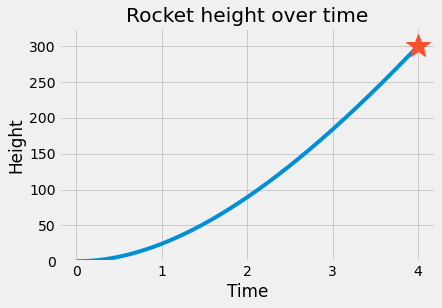

In [61]:
plt.plot(t,rheight);
plt.plot(t[-1],rheight[-1], '*', markersize = 25)
plt.title('Rocket height over time');
plt.ylim(0,325);
plt.ylabel('Height');
plt.xlabel('Time');